# Random walk with drift

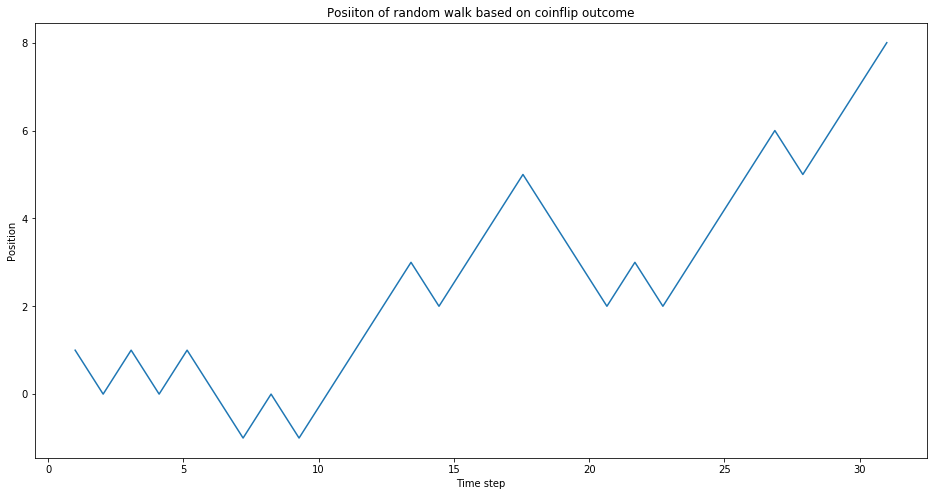

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt


class randomWalk:
    def __init__(self, position=0, p_heads=0.6):
        self.position = position
        self.p_heads = p_heads

    def step(self):
        # when the coin lands on heads
        if random.random() < self.p_heads:
            self.position += 1
        else: 
            self.position -= 1

    def display(self):
        return(self.position)

sim = randomWalk()
path = []
for _ in range(30):
    sim.step()
    path.append(sim.display())

plt.figure(figsize=(16,8))
x = np.linspace(1, 31, 30)
plt.xlabel("Time step")
plt.ylabel("Position")
plt.plot(x, path)
plt.title("Posiiton of random walk based on coinflip outcome")
plt.show()

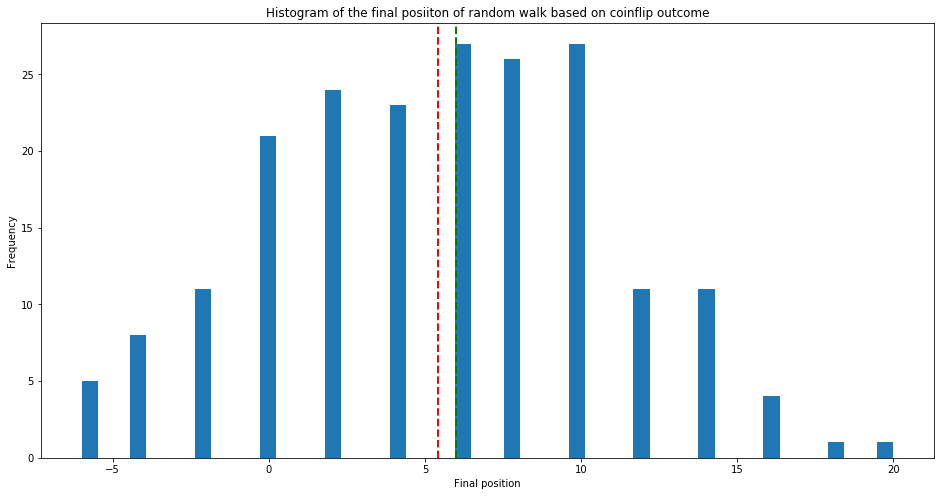

The sample mean is 5.42.
The sample variance is 28.8236.


In [46]:
final_pos_list = []

for _ in range(200):
    sim2 = randomWalk()
    for _ in range(30):
        sim2.step()
    final_pos_list.append(sim2.display())

plt.figure(figsize=(16,8))
plt.hist(final_pos_list, bins=50)
plt.axvline(np.mean(final_pos_list), color='r', linestyle='dashed', linewidth=2)
plt.axvline(6, color='g', linestyle='dashed', linewidth=2)
plt.xlabel("Final position")
plt.ylabel("Frequency")
plt.title("Histogram of the final posiiton of random walk based on coinflip outcome")
plt.show()

print(f"The sample mean is {round(np.mean(final_pos_list), 4)}.")
print(f"The sample variance is {round(np.var(final_pos_list), 4)}.")

# Gambler's Ruin

In [57]:
def gamblersRuin():
    gambler = 100
    casino = 2000
    count = 0
    while gambler != 0 and casino != 0:
        i = random.random()
        if i < 0.5:
            gambler+=1
            casino-=1
            count+=1
        else:
            gambler-=1
            casino+=1
            count+=1
    if gambler == 0:
        print("Gambler is broke!")
        print(count)
    if casino == 0:
        print("Casino is broke!")
        print(count)

gamblersRuin()

Gambler is broke!
45678


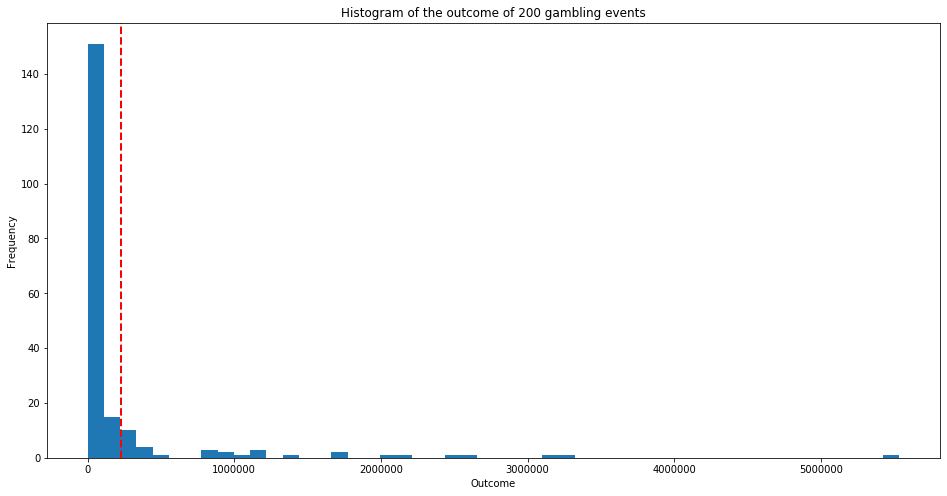

The sample mean is 228061.9.
The sample variance is 409446730787.87.


In [58]:
def gamblersRuinMC():
    gambler = 100
    casino = 2000
    count = 0
    while gambler != 0 and casino != 0:
        i = random.random()
        if i < 0.5:
            gambler+=1
            casino-=1
            count+=1
        else:
            gambler-=1
            casino+=1
            count+=1
    return(count)

outcomes = []

for _ in range(200):
    outcomes.append(gamblersRuinMC())

plt.figure(figsize=(16,8))
plt.hist(outcomes, bins=50)
plt.axvline(np.mean(outcomes), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Histogram of the outcome of 200 gambling events")
plt.show()

print(f"The sample mean is {round(np.mean(outcomes), 4)}.")
print(f"The sample variance is {round(np.var(outcomes), 4)}.")

# Monty Hall

In [0]:
required_experiments = 100000

In [60]:
# The Monty Hall scenario.

experiments = 0
successes = 0
while experiments < required_experiments:

    # The car is hidden behind a random door
    car_door = random.randint(1, 3)

    # The contestant selects a random door
    contestant_door = random.randint(1, 3)

    # The host opens a different door that has a goat behind it
    host_door = random.choice(list(set([1, 2, 3]) - set([car_door, contestant_door]))) 

    # The contestant switches to the other door (not the one she chose originally and not the goat)
    contestant_door = (set([1, 2, 3]) - set([contestant_door, host_door])).pop()

    # Did the contestant win? Count that as a success.
    if contestant_door == car_door:
        successes += 1
    experiments += 1

print(successes / experiments)

0.66829


In [61]:
# The earthquake scenario.

experiments = 0
successes = 0
while experiments < required_experiments:

    car_door = random.randint(1, 3)  # The car is hidden behind a random door

    contestant_door = random.randint(1, 3)  # The contestant selects a random door

    earthquake_door = random.randint(1, 3)  # The earthquake opens a random door

    # What if the earthquake opened the contestant's door? Nothing, the contestant just switches to another one.
    # What if the earthquake opened the door with a car behind it?
    if earthquake_door == car_door:
        # This does not fit the scenario so don't count it as a valid experiment.
        continue

    # The contestant switches to another door (not the one she chose originally and not the goat).
    contestant_door = random.choice(list(set([1, 2, 3]) - set([contestant_door, earthquake_door])))

    # Did the contestant get the car? Count that as a success.
    if contestant_door == car_door:
        successes += 1
    experiments += 1

print(successes / experiments)

0.50073


### Analyzing how quickly the error converges to the true value for the (standard) Monty Hall scenario

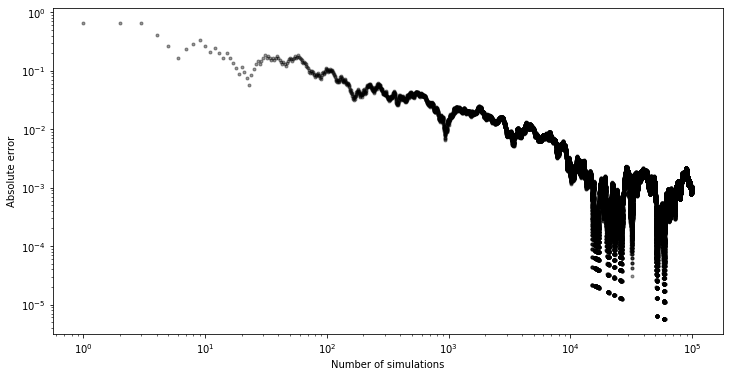

In [62]:
import matplotlib.pyplot as plt

true_value = 2/3
errors = []

experiments = 0
successes = 0
while experiments < required_experiments:
    car_door = random.randint(1, 3)
    contestant_door = random.randint(1, 3)
    host_door = random.choice(list(set([1, 2, 3]) - set([car_door, contestant_door]))) 
    contestant_door = (set([1, 2, 3]) - set([contestant_door, host_door])).pop()
    if contestant_door == car_door:
        successes += 1
    experiments += 1
    errors.append(abs(true_value - successes / experiments))

plt.figure(figsize=(12, 6))
plt.loglog(range(1, experiments + 1), errors, 'k.', alpha = 0.4)
plt.xlabel('Number of simulations')
plt.ylabel('Absolute error')
plt.show()

### Analyzing how quickly the error converges to the true value for the Earthquake version of the Monty Hall scenario

In [0]:
def simulate_Monty_hall_earthquake(n):
    random.seed(2)
    switchscore = 0
    stayscore = 0
    doors = [1,2,3]
    counter = 0
    errors = []
    for i in range(1, n+1):
        car = random.sample(doors, 1)
        my_guess = random.sample(doors, 1)
        earthquake_door = random.sample(set(doors) - set(my_guess), 1)
        if earthquake_door != car:
            counter+=1
            if my_guess == car:
                stayscore+= 1
            else:
                switchscore += 1
            errors.append(abs(1/2 - switchscore/counter) )

        else:
            continue
    plt.figure(figsize=(12, 6))
    plt.loglog(range(1, counter + 1), errors, 'k.', alpha=0.4)
    plt.xlabel('Number of simulations')
    plt.ylabel('Absolute error')
    plt.show()
    return stayscore/counter, switchscore/counter

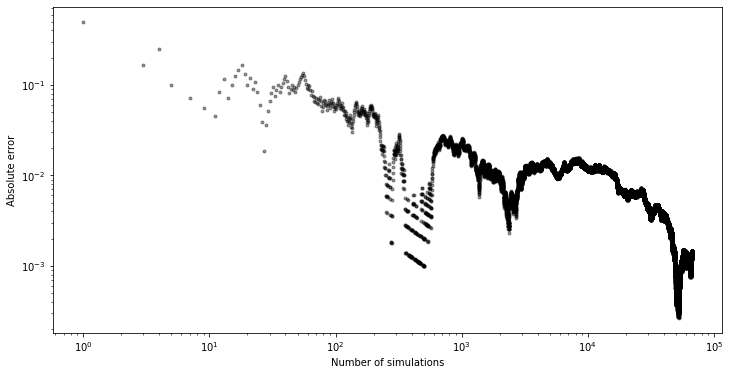

(0.4987066194171564, 0.5012933805828437)

In [64]:
simulate_Monty_hall_earthquake(required_experiments)